In [1]:
#Load and Clean the Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import shap
import matplotlib.pyplot as plt

# Load dataset
file_path = r"DataCoSupplyChainDataset.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Drop columns with excessive missing values
df_cleaned = df.drop(columns=["Order Zipcode", "Product Description"], errors="ignore")

# Drop rows with missing values in critical columns
df_cleaned = df_cleaned.dropna(subset=["Customer Lname", "Customer Zipcode"])


In [2]:

# Define target variable (assumption: predicting "Sales")
target_column = "Sales"

# Select numeric features (excluding irrelevant columns)
numeric_features = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Exclude target variable from features
numeric_features.remove(target_column)

# Prepare feature matrix (X) and target variable (y)
X = df_cleaned[numeric_features]
y = df_cleaned[target_column]

# Extract Customer ID for stratified splitting
customer_ids = df_cleaned["Customer Id"]

In [3]:
import xgboost as xgb

print("XGBoost Version:", xgb.__version__)

# Check if GPU is available
dtrain = xgb.DMatrix([[1, 2], [3, 4]], label=[0, 1])

# Correct GPU parameters (Use GPU1 explicitly)
params = {"tree_method": "hist", "device": "cuda:0"}  # Force GPU1

try:
    xgb.train(params, dtrain, num_boost_round=1)
    print("✅ GPU1 is being used!")
except xgb.core.XGBoostError as e:
    print("❌ GPU is NOT being used. Error:", e)


XGBoost Version: 2.1.3
✅ GPU1 is being used!


[I 2025-02-12 23:27:07,460] A new study created in memory with name: no-name-5e1d476a-086c-4bfb-89cd-a1a87bb12294


Generated random seeds: [483, 463, 757, 892, 315]
Running for Seed: 483


C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-12 23:27:08,445] Trial 0 finished with value: 0.9699445158294188 and parameters: {'learning_rate': 0.0972499405976027, 'max_depth': 9, 'n_estimators': 96, 'subsample': 0.8741284538950042, 'colsample_bytree': 0.5381547539454468}. Best is trial 0 with value: 0.9699445158294188.
C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-12 23:27:08,761] Trial 1 finished with value: 15.819387257518663 an

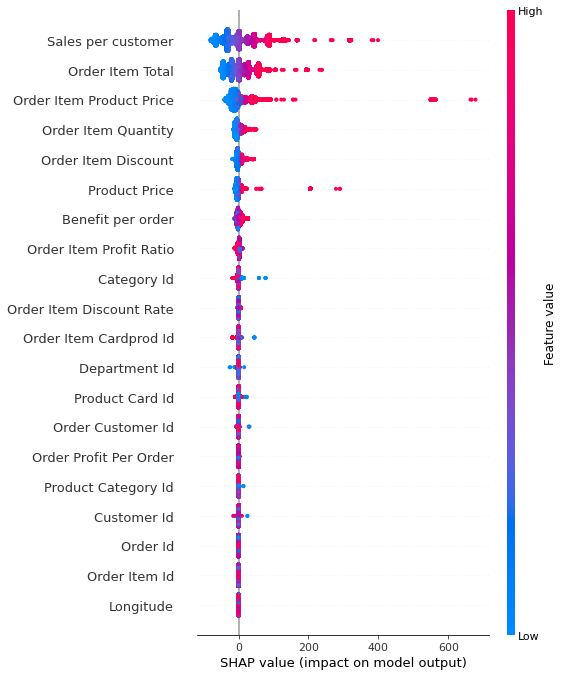

[I 2025-02-12 23:27:15,566] A new study created in memory with name: no-name-7bb31cac-fe7f-4be3-9216-a34cb8f5149e


Running for Seed: 463


C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-12 23:27:16,228] Trial 0 finished with value: 1.0684453166112047 and parameters: {'learning_rate': 0.058958737596824365, 'max_depth': 7, 'n_estimators': 106, 'subsample': 0.8284715163625119, 'colsample_bytree': 0.659371741497587}. Best is trial 0 with value: 1.0684453166112047.
C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-12 23:27:16,993] Trial 1 finished with value: 0.6928962882507332 

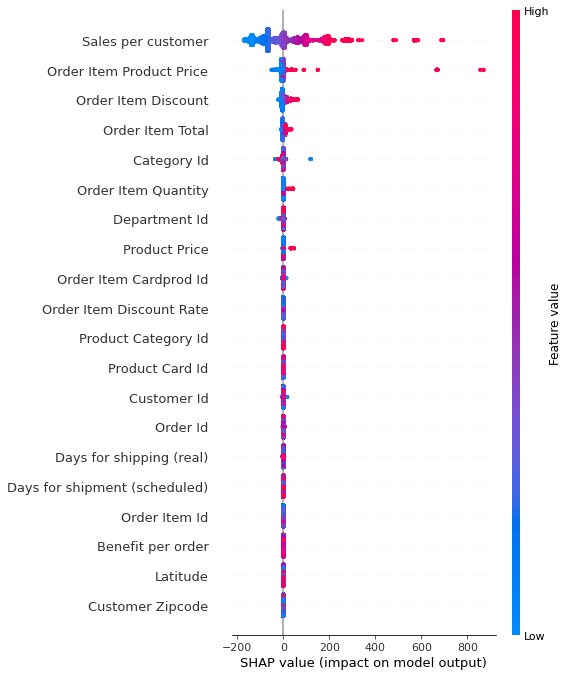

[I 2025-02-12 23:27:22,491] A new study created in memory with name: no-name-594be3ac-e841-4f0f-af27-9a89f54e288e


Running for Seed: 757


C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-12 23:27:23,220] Trial 0 finished with value: 5.483399552907898 and parameters: {'learning_rate': 0.040331052699767965, 'max_depth': 7, 'n_estimators': 79, 'subsample': 0.6129683931672834, 'colsample_bytree': 0.8391634013366494}. Best is trial 0 with value: 5.483399552907898.
C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-12 23:27:24,564] Trial 1 finished with value: 13.403104652857236 an

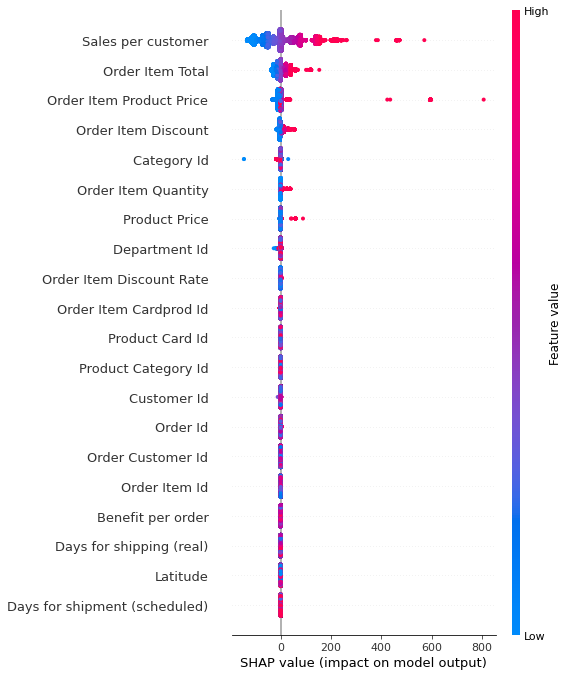

[I 2025-02-12 23:27:29,794] A new study created in memory with name: no-name-1f9fafd2-8949-4dc3-bb13-ebd21a8e0cae


Running for Seed: 892


C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-12 23:27:30,536] Trial 0 finished with value: 44.65015620343412 and parameters: {'learning_rate': 0.017274195323397547, 'max_depth': 10, 'n_estimators': 62, 'subsample': 0.6661960331999026, 'colsample_bytree': 0.7616486920765492}. Best is trial 0 with value: 44.65015620343412.
C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-12 23:27:31,484] Trial 1 finished with value: 1.9668983209819748 a

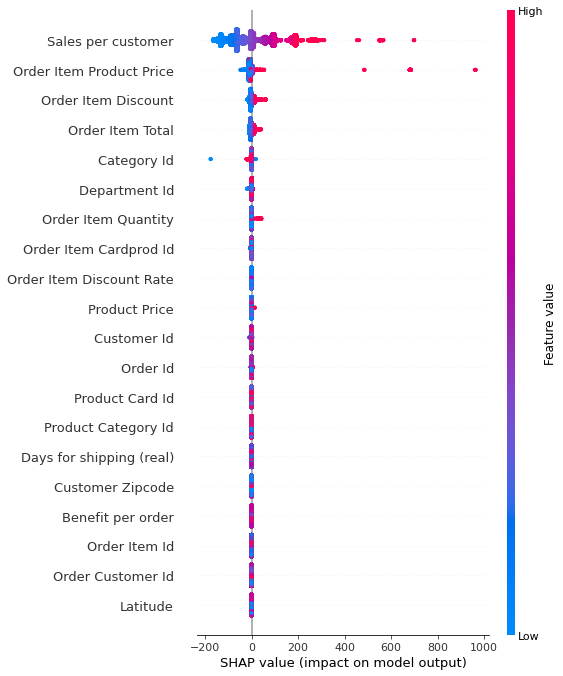

[I 2025-02-12 23:27:37,799] A new study created in memory with name: no-name-05b9abdc-414a-436c-b755-af6149ed0b11


Running for Seed: 315


C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-12 23:27:38,554] Trial 0 finished with value: 15.195816444624054 and parameters: {'learning_rate': 0.023803548683369275, 'max_depth': 7, 'n_estimators': 91, 'subsample': 0.9355264443395127, 'colsample_bytree': 0.7930841510012998}. Best is trial 0 with value: 15.195816444624054.
C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-12 23:27:39,368] Trial 1 finished with value: 0.8042455378821174 

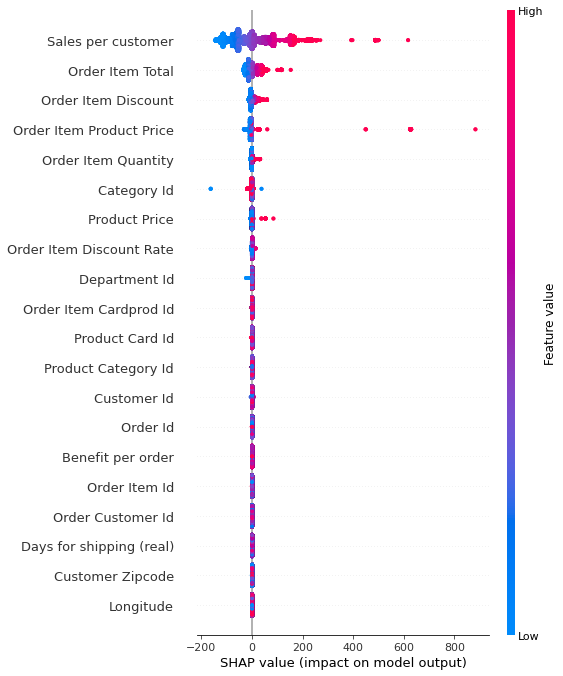

   Seed                                        Best Params       MAE  \
0   483  {'learning_rate': 0.0972499405976027, 'max_dep...  0.383422   
1   463  {'learning_rate': 0.0960059391322448, 'max_dep...  0.134496   
2   757  {'learning_rate': 0.040331052699767965, 'max_d...  3.812719   
3   892  {'learning_rate': 0.026162346071697866, 'max_d...  1.217883   
4   315  {'learning_rate': 0.062336276377970616, 'max_d...  0.263967   

       RMSE        R²  
0  1.338721  0.999897  
1  0.709967  0.999972  
2  5.321085  0.998308  
3  1.982110  0.999777  
4  0.888457  0.999954  


In [4]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import random

# Generate 5 random seeds
random_seeds = [random.randint(0, 1000) for _ in range(5)]
print("Generated random seeds:", random_seeds)

# Store results
results = []

# Function to optimize XGBoost using Optuna
def objective(trial, dtrain, dvalid):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'tree_method': 'hist',  # Use GPU for acceleration
        'device': 'cuda:0'
    }
    model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])
    
    y_pred = model.predict(dvalid)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)  # RMSE
    return rmse

# Adjustments for faster performance
n_trials = 3  # Reduced for speed

# Dictionary to store study objects
studies = {}

# Splitting data by Customer ID
def split_by_customer(X, y, customer_ids, test_size=0.2, valid_size=0.2, random_state=42):
    unique_customers = np.array(customer_ids.unique())
    train_customers, test_customers = train_test_split(unique_customers, test_size=test_size, random_state=random_state)
    X_train, y_train = X[customer_ids.isin(train_customers)], y[customer_ids.isin(train_customers)]
    X_test, y_test = X[customer_ids.isin(test_customers)], y[customer_ids.isin(test_customers)]
    
    train_customers, valid_customers = train_test_split(train_customers, test_size=valid_size, random_state=random_state)
    X_train, y_train = X[customer_ids.isin(train_customers)], y[customer_ids.isin(train_customers)]
    X_valid, y_valid = X[customer_ids.isin(valid_customers)], y[customer_ids.isin(valid_customers)]
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test

for seed in random_seeds:
    print("Running for Seed:", seed)
    
    X_train, X_valid, X_test, y_train, y_valid, y_test = split_by_customer(X, y, customer_ids, random_state=seed)
    
    # Convert data to DMatrix for efficiency
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Create Optuna study
    study = optuna.create_study(direction='minimize', sampler=TPESampler())
    study.optimize(lambda trial: objective(trial, dtrain, dvalid), n_trials=n_trials, timeout=60)
    
    best_params = study.best_params
    best_params['tree_method'] = 'hist'
    best_params['device'] = 'cuda'
    
    # Train final model with best parameters
    model = xgb.train(best_params, dtrain, num_boost_round=best_params['n_estimators'])
    
    y_pred = model.predict(dtest)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results.append((seed, best_params, mae, rmse, r2))
    
    # SHAP Explainability
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test)
    
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Seed', 'Best Params', 'MAE', 'RMSE', 'R²'])
print(results_df)

# Save results to CSV
results_df.to_csv("optimized_xgboost_results_with_shap_v3.csv", index=False)


C:\Users\te529963\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


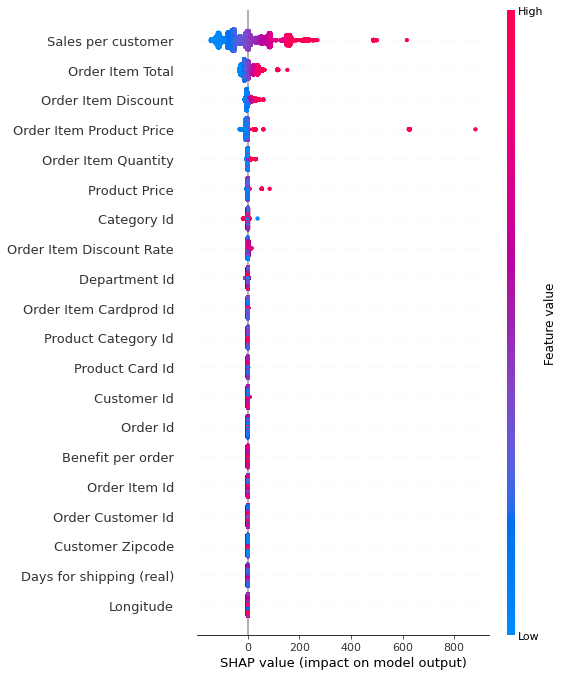

Available Features: ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price', 'Product Status']


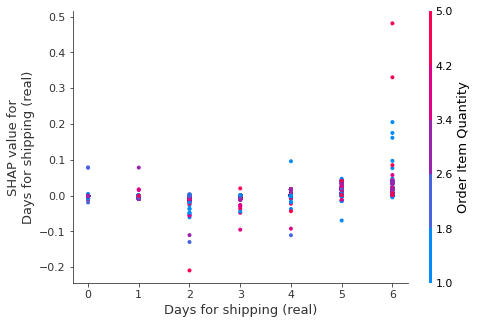

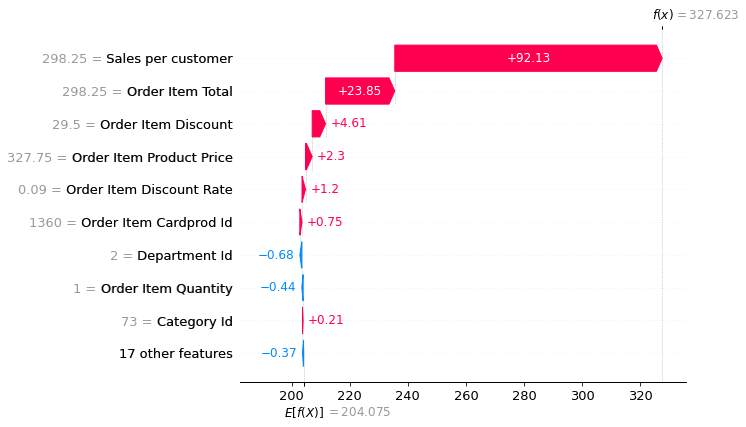

In [6]:
import shap
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert data to DMatrix format for XGBoost Native API
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Train the best XGBoost model using Native API
best_model = xgb.train(best_params, dtrain, num_boost_round=200)

# Compute SHAP values using TreeExplainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_valid)

# SHAP Summary Plot - Feature Importance
shap.summary_plot(shap_values, X_valid)

# Print feature names to choose one for dependence plot
print("Available Features:", X_valid.columns.tolist())

# Choose a valid feature name from the printed list
selected_feature = X_valid.columns[0]  # Change index as needed

# SHAP Dependence Plot
shap.dependence_plot(selected_feature, shap_values, X_valid)

# Alternative: Waterfall Plot (instead of deprecated Force Plot)
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_valid.iloc[0]))
